# 4_动能指标策略
*用动能指标交易*

## 目录

- 什么是动能指标?
- MOM/MACD/RSI/Stochastic是怎么计算的?
- 如何用图像展示动能指标？
- 如何用动能指标做策略?

## 什么是动能指标?
动能指标对价格的计算与物理学中对速度的计算相似，需要知道价格移动的距离、时间、移动的速度与加速度，这些变化都反映着市场价格在不同维度上的变化。动能指标的类型主要有两种，一种是Momentum 指标，它有中间轴，可以是0或100，上下没有界限；另一种是Oscillator 振荡器，它的取值在0至100之间。

## MOM/MACD/RSI/Stochastic是怎么计算的?

---

### 1. Momentum

$ROCR100=(Rrice_t/prevPrice_{t-10})*100$

---

### 2. MACD
$MACD = 12'day 'EMA - 26'day'EMA$

$MACD'signal=9'day 'EMA(MACD)$

$Hist = MACD - MACD' signal$

---

### 3. RSI

$RSI=100-\frac{100}{1+RS}$

$RS=\frac{\text{average of net UP closing changes for selected period of days}}{\text{average of net DOWN closing changes for selected period of days}}$

---

### 4. Stochastic
$Fast'K=\frac{C_t-L_n}{H_n-L_n}$

$Slow'K=MA(Fast'K,3)$

$Slow'D=MA(Slow'K,3)$

## 如何用图像展示动能指标？

In [1]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib as ta
from talib import abstract

warnings.filterwarnings('ignore')

data = pd.Panel({s: pd.read_excel('three.xlsx', sheetname=s, index_col='datetime') 
                   for s in ['BTCUSDT.binance', 'EOSUSDT.binance', 'ETHUSDT.binance']})

In [2]:
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values, 60) for item, value in data.minor_xs('close').iteritems()}, 
             index = data.minor_xs('close').index)

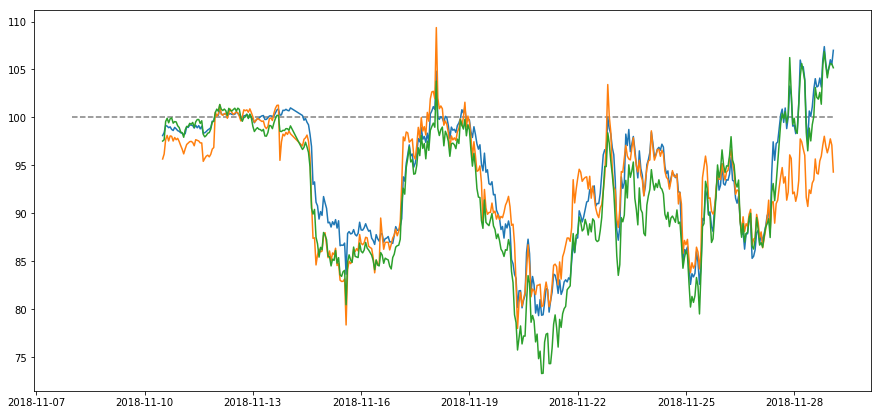

In [3]:
fig = plt.figure(figsize=(15, 7))
plt.hlines(100,ROCR100.index[0],ROCR100.index[-1] , linestyles='dashed', alpha=0.5)
plt.plot(ROCR100)
plt.show()

In [14]:
dataBtc = data['BTCUSDT.binance'].iloc[-200:]

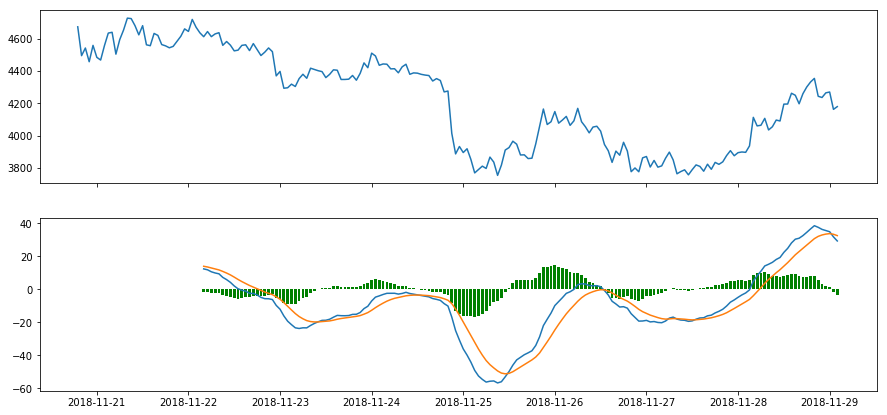

In [19]:
#MACD
macd = abstract.MACD(dataBtc,price='close')
# macd
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(dataBtc['close'])
ax1.plot( macd['macd'])
ax1.plot(macd['macdsignal'])
ax1.bar(macd.index, macd['macdhist'], width=0.03, color='g')
plt.show()

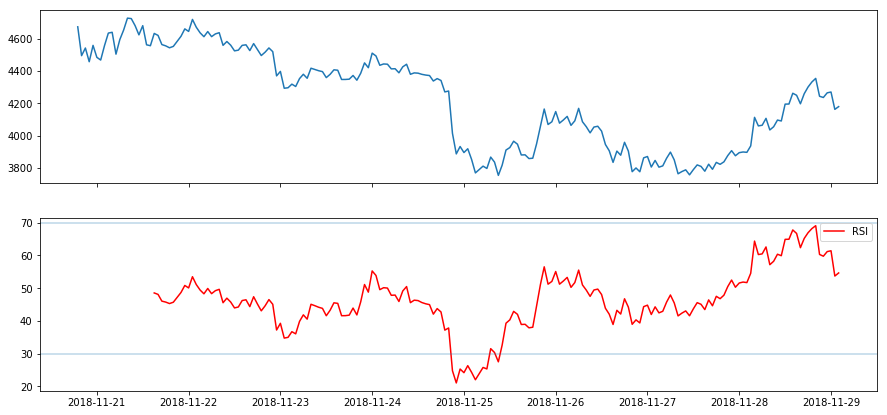

In [21]:
#RSI
RSI = abstract.RSI(dataBtc, 20, price='close')

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(dataBtc['close'])
ax1.plot(RSI,'r', label='RSI')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend()
plt.show()

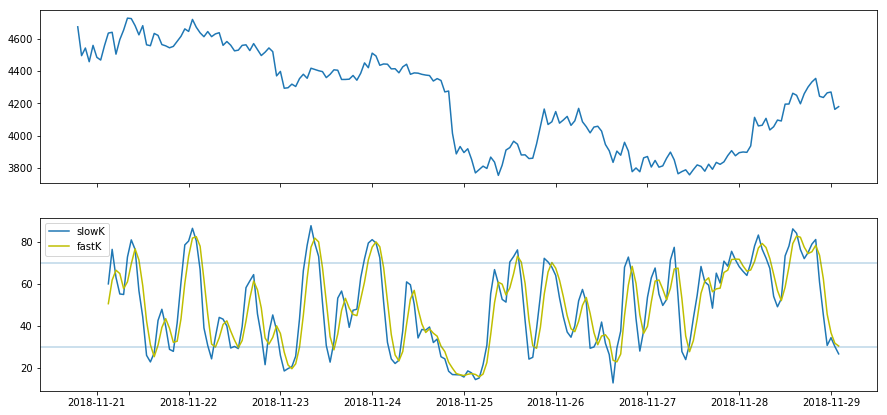

In [24]:
#Stochastic
KDJ = abstract.STOCH(dataBtc)

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(dataBtc['close'])
ax1.plot(KDJ['slowk'], label='slowK')
ax1.plot(KDJ['slowd'],'y', label='fastK')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend(loc='upper left')
plt.show()

## 如何用动能指标做策略?

**1. 图表的领先形态（Charting Patterns-Leading ahead）:**
可以通过观察指标对价格做领先的形态或走势判断。

**2. 交叉信号（Cross Signals）：**
快线高于慢线金叉，看涨；快线低于慢线死叉，看跌。

**3. 柱的斜率（The slope of MACD-Histogram）：**
当前的柱比前一根高，看涨；当前的柱比前一根低，看跌。

**4. 超买超卖（Overbought/OverSold）：**
当振荡器高于上方的值如RSI(70)为超买，低于下方的值如RSI(30)为超卖，超卖买入，超买卖出。

**5. 背离（Divergence）：**
价格创新高，而指标没有创新高，顶背离，看跌。
价格创新低，而指标没有创新低，底背离，看涨。


## RSI判断超买超卖方法: 
**底背离买入：**
RSI< 30

**顶背离卖出：**
RSI>70

In [ ]:
# 策略参数
RSIPeriod = 20
lot = 1

# 计算信号
rsi = ta.RSI(am3.close, self.RSIPeriod)

# 现象条件
overBought = rsi[-1] > 70
overSold = rsi[-1] < 30

# 进出场条件
if overSold and (self.posDict[symbol + "_LONG"]==0):
    if self.posDict[symbol + "_SHORT"] == 0:
        self.buy(symbol, bar.close * 1.01, self.lot)
    elif self.posDict[symbol + "_SHORT"] > 0:
        self.cover(symbol, bar.close * 1.02, self.posDict[symbol + "_SHORT"])
        self.buy(symbol, bar.close * 1.01, self.lot)
        
elif overBought and (self.posDict[symbol + "_SHORT"] == 0):
    if self.posDict[symbol + "_LONG"] == 0:
        self.short(symbol, bar.close * 0.99, self.lot)
    elif self.posDict[symbol + "_LONG"] > 0:
        self.sell(symbol, bar.close * 0.99, self.posDict[symbol + "_LONG"])
        self.short(symbol, bar.close *0.99, self.lot)

## 作业
根据RSI背离策略例子，写出其他的动能策略